In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Finished degree 1
0.31407568
Finished degree 2
0.31330588
Finished degree 3
0.10986921
Finished degree 4
0.11843082
Finished degree 5
0.13300498
Finished degree 6
0.28992522


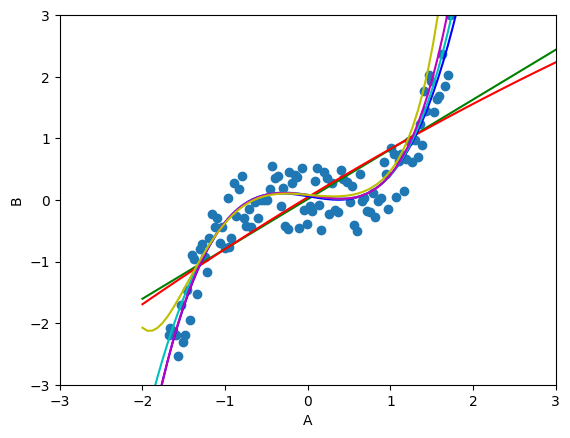

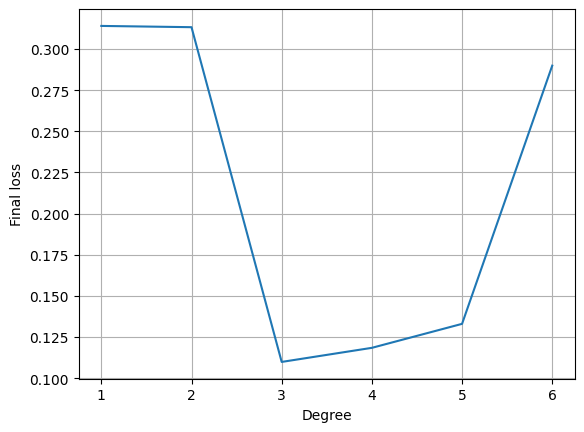

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Domaci1/Zadatak1/funky.csv'
all_data = np.loadtxt(filename, delimiter=',', dtype='float32')

np.set_printoptions(suppress = True, precision = 5)

data = dict()
data['x'] = all_data[:, 0]
data['y'] = all_data[:, 1]


#Mesanje
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

#Normalizacija
data['x'] = (data['x'] - np.mean(data['x'])) / np.std(data['x'])
data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

#Iscrtavanje
plt.scatter(data['x'], data['y'])
plt.xlabel('A')
plt.ylabel('B')


#f-ja koja od ulaza pravi feature matricu
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features + 1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)

learning_rate = 0.01
nb_epochs = 100



def pred(x, w, b):
  w_col = tf.reshape(w, (nb_features, 1))
  hyp = tf.add(tf.matmul(x, w_col), b)
  return hyp

def loss(x, y, w, b):
  prediction = pred(x, w, b)

  y_col = tf.reshape(y, (-1, 1))

  mse = tf.reduce_mean(tf.square(prediction - y_col))

  loss = mse

  return loss

def calc_grad(x, y, w, b):
  with tf.GradientTape() as tape:
    loss_val = loss(x, y, w, b)

  w_grad, b_grad = tape.gradient(loss_val, [w, b])

  return w_grad, b_grad, loss_val

# adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
adam = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

def train_step(x, y, w, b):
  w_grad, b_grad, loss = calc_grad(x, y, w, b)

  adam.apply_gradients(zip((w_grad, b_grad), (w, b)))

  return loss

# nb_features = [1, 2, 3, 4, 5, 6]

degrees = [1, 2, 3, 4, 5, 6]

colors = ['g', 'r', 'b', 'c', 'm', 'y']
degree_loss = []


for degree in degrees:

  nb_features = degree

  tmp_x = create_feature_matrix(data['x'], nb_features)

  w = tf.Variable(tf.zeros(nb_features))
  b = tf.Variable(0.0)

  for epoch in range(nb_epochs):


    for sample in range(nb_samples):
      x = tmp_x[sample].reshape((1, nb_features))
      y = data['y'][sample]

      curr_loss = train_step(x, y, w, b)

  xs = create_feature_matrix(np.linspace(-2,4,100, dtype='float32'), nb_features)
  hyp_val = pred(xs, w, b)
  plt.plot(xs[:, 0].tolist(), hyp_val.numpy().tolist(), colors[degrees.index(degree)])
  print('Finished degree ' + str(degree))
  final_loss = loss(tmp_x, data['y'], w, b)
  print(final_loss.numpy())
  degree_loss.append(final_loss.numpy())

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

plt.plot(degrees, degree_loss)
plt.xlabel('Degree')
plt.ylabel('Final loss')
plt.grid()
plt.show()




